In [28]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import numpy as np


ModuleNotFoundError: No module named 'researchpy'

In [3]:
# read in the csv file
dog_df = pd.read_csv("../../project1/analysis/Datasets/merged_dog_data.csv")

In [4]:
# display the first 12 rows of the data
dog_df.head(12)


,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
5,5,69339116,IL145,il145,https://www.petfinder.com/dog/brittany-spears-...,Dog,Young,Female,Medium,Curly,...,IL,60477,US,69339116,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
6,6,69339039,IL145,il145,https://www.petfinder.com/dog/jojo-69339039/il...,Dog,Young,Female,Large,Curly,...,IL,60477,US,69339039,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
7,7,69339013,IL145,il145,https://www.petfinder.com/dog/maverick-in-fost...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339013,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
8,8,69338962,IL145,il145,https://www.petfinder.com/dog/cleo-69338962/il...,Dog,Baby,Female,Medium,Medium,...,IL,60477,US,69338962,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
9,9,69338238,WI81,wi81,https://www.petfinder.com/dog/ripley-69338238/...,Dog,Young,Male,Small,Medium,...,WI,53186,US,69338238,dog,WI81,wi81,0.0,2023-10-17 21:42:51.576571-05:00,0


In [5]:
# check the names of the columns and see if there are any rows with missing data
dog_df.count()


Unnamed: 0                  8000
id                          8000
organization_id             8000
organization_id.1           8000
url                         8000
species                     8000
age                         8000
gender                      8000
size                        8000
coat                        2836
tags                        8000
name                        8000
description                 6725
organization_animal_id      4566
photos                      8000
status                      8000
status_changed_at           8000
published_at                8000
distance                    8000
breeds.primary              8000
breeds.secondary            3048
breeds.mixed                8000
breeds.unknown              8000
colors.primary              3470
colors.secondary            1839
colors.tertiary              202
attributes.special_needs    8000
attributes.shots_current    8000
environment.children        3112
environment.dogs            4098
environmen

In [6]:

# drop the columns that are duplicates or unnecessary: Unnamed:0, organization_id.1, organization_id.3,  
column_list= ['Unnamed: 0', 'organization_id.1', 'organization_id.3']

dog_df = dog_df.drop(column_list, axis=1)
dog_df.count()


id                          8000
organization_id             8000
url                         8000
species                     8000
age                         8000
gender                      8000
size                        8000
coat                        2836
tags                        8000
name                        8000
description                 6725
organization_animal_id      4566
photos                      8000
status                      8000
status_changed_at           8000
published_at                8000
distance                    8000
breeds.primary              8000
breeds.secondary            3048
breeds.mixed                8000
breeds.unknown              8000
colors.primary              3470
colors.secondary            1839
colors.tertiary              202
attributes.special_needs    8000
attributes.shots_current    8000
environment.children        3112
environment.dogs            4098
environment.cats            1942
contact.address.address1    4512
contact.ad

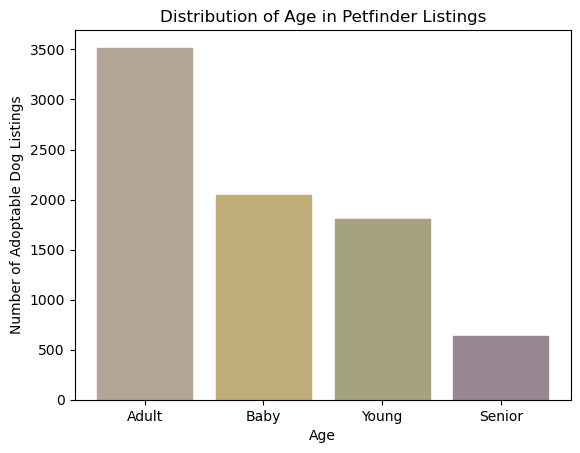

In [18]:
# What is the age breakdown of the total dogs, the adoptable dogs, and the adopted dogs?

# total dogs

age_count = dog_df.age.value_counts()

x = age_count.index
y = age_count.values

colors = ['#b2a596', '#c1ad77', '#a5a37e','#988792']


bars = plt.bar(x,y)
plt.ylabel('Number of Adoptable Dog Listings')
plt.xlabel('Age')
plt.title('Distribution of Age in Petfinder Listings')
for bar, color in zip(bars, colors):
    bar.set_color(color)



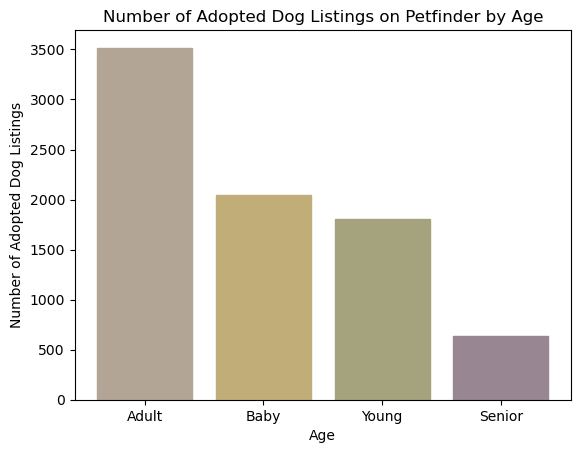

In [19]:
# adopted dogs
adopted = dog_df.loc[(dog_df['status']== 'adopted')]
adopted_age_distribution= adopted.age.value_counts()

x2 = age_count.index
y2 = age_count.values

colors = ['#b2a596', '#c1ad77', '#a5a37e','#988792']

bars = plt.bar(x2,y2)
plt.ylabel('Number of Adopted Dog Listings')
plt.xlabel('Age')
plt.title('Number of Adopted Dog Listings on Petfinder by Age')
for bar, color in zip(bars, colors):
    bar.set_color(color)

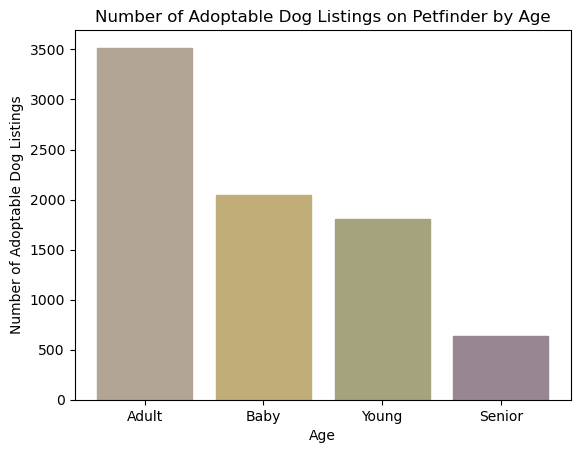

In [20]:
# adoptable dogs
adoptable = dog_df.loc[(dog_df['status']== 'adoptable')]
adoptable_age_distribution= adoptable.age.value_counts()

x3 = age_count.index
y3 = age_count.values

colors = ['#b2a596', '#c1ad77', '#a5a37e','#988792']

bars = plt.bar(x3,y3)
plt.ylabel('Number of Adoptable Dog Listings')
plt.xlabel('Age')
plt.title('Number of Adoptable Dog Listings on Petfinder by Age')
for bar, color in zip(bars, colors):
    bar.set_color(color)

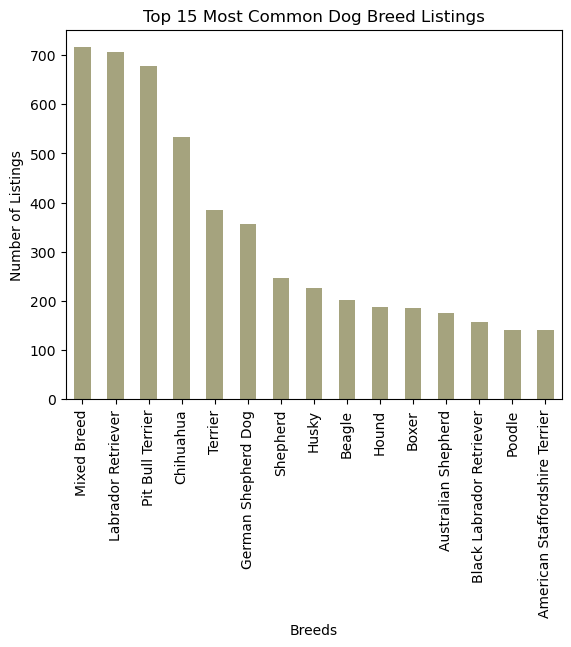

In [29]:
# which breeds are the top 10 most common?
breeds = dog_df['breeds.primary']

breed_count = dog_df['breeds.primary'].value_counts()


x = breed_count.index 
y = breed_count.values
breed_count


breed_count[:15].plot(kind='bar', color='#a5a37e', title='Top 15 Most Common Dog Breed Listings', xlabel='Breeds', ylabel='Number of Listings')
plt.show()


In [25]:
# what are the most common dog names in the listings? Keep in mind that some listings have multiple names listed
names_counted = dog_df['name'].value_counts()
names_counted

name
Bella                 27
Max                   26
Ace                   22
Molly                 22
Charlie               21
                      ..
Jane Porter            1
Lyanna                 1
Neve                   1
Dino the Dinosaur      1
06-0617                1
Name: count, Length: 4766, dtype: int64

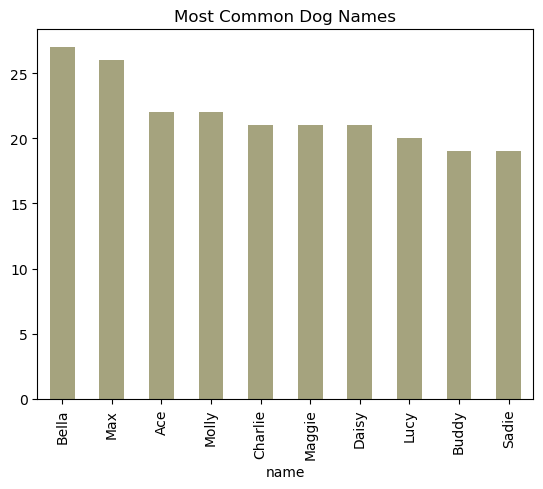

In [26]:
# Most common names bar chart
names_counted[:10].plot(kind='bar', color='#a5a37e', title='Most Common Dog Names')
plt.show()

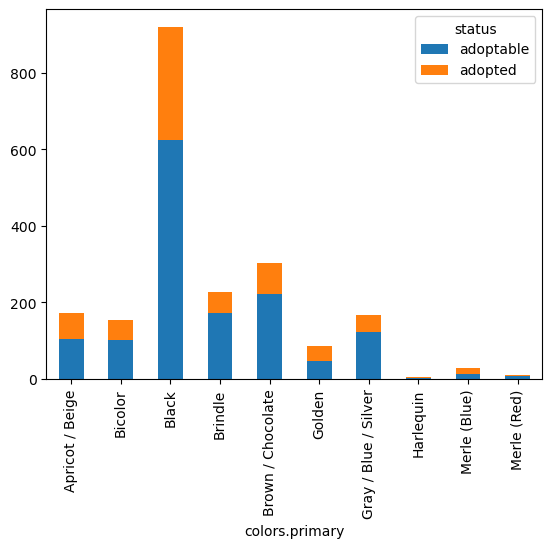

In [27]:
breed_adoptedvsadoptable = dog_df.groupby(['colors.primary','status']).size()

breeds_unstacked = breed_adoptedvsadoptable.unstack(level='status')

breeds_unstacked[:10].plot.bar(stacked=True)
plt.show()

In [ ]:
results = rp.ttest(group1= df['after'][df['sex'] == 'Male'], group1_name= "Male",
                            group2= df['after'][df['sex'] == 'Female'], group2_name= "Female")
rp.ttest(group1= df['the end result name'][df['sex'] == 'Male'], group1_name= "Male",
         group2= df['(the end result name'][df['sex'] == 'Female'], group2_name= "Female")

stats.ttest_ind(male, female. equal_var=False)





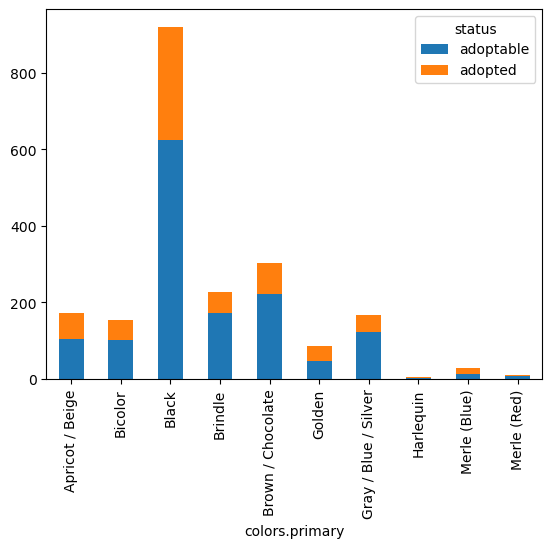

In [30]:
breed_adoptedvsadoptable = dog_df.groupby(['colors.primary','status']).size()

breeds_unstacked = breed_adoptedvsadoptable.unstack(level='status')

breeds_unstacked[:10].plot.bar(stacked=True)
plt.show()



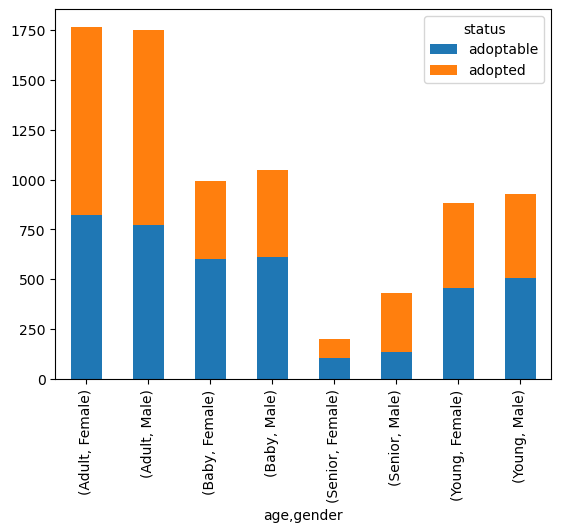

In [31]:

adoptable = dog_df.loc[(dog_df['status']== 'adoptable')]
adoptable_gender = dog_df.groupby(['age', 'gender', 'status']).size()

adoptable_unstacked = adoptable_gender.unstack(level='status')

adoptable_unstacked.plot.bar(stacked=True)
plt.show()



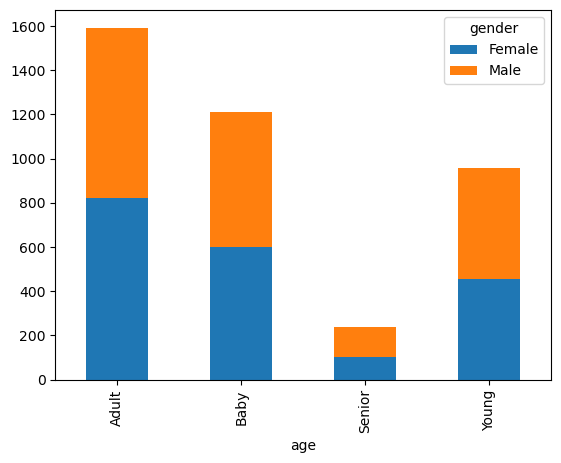

In [32]:
adoptable = dog_df.loc[(dog_df['status']== 'adoptable')]
adoptable_gender = adoptable.groupby(['age', 'gender']).size()

adoptable_unstacked = adoptable_gender.unstack()

adoptable_unstacked.plot.bar(stacked=True)
plt.show()

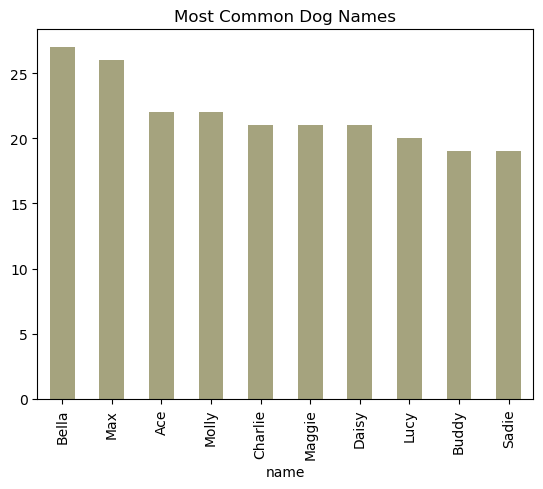

In [33]:
# Most common names bar chart
names_counted[:10].plot(kind='bar', color='#a5a37e', title='Most Common Dog Names')
plt.show()